# DECISION TREE 

> - Phases:
    - Building Phase
      - Preprocess the dataset.
      - Split the dataset from train and test using Python sklearn package.
      - Train the classifier.
    - Operational Phase
      - Make predictions.
      - Calculate the accuracy.

## Title: Wine Quality :
   - These datasets can be viewed as classification or regression tasks.
   - The classes are ordered and not balanced (e.g. there are munch more normal wines than
     excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
     or poor wines.
   - Also, we are not sure if all input variables are relevant. So
     it could be interesting to test feature selection methods. 



## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None



### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


> # Objectives:
 - To explore the physiocochemical properties of red wine
 - To determine an optimal machine learning model for red wine quality classification


## IMPLEMENTATION DTs 

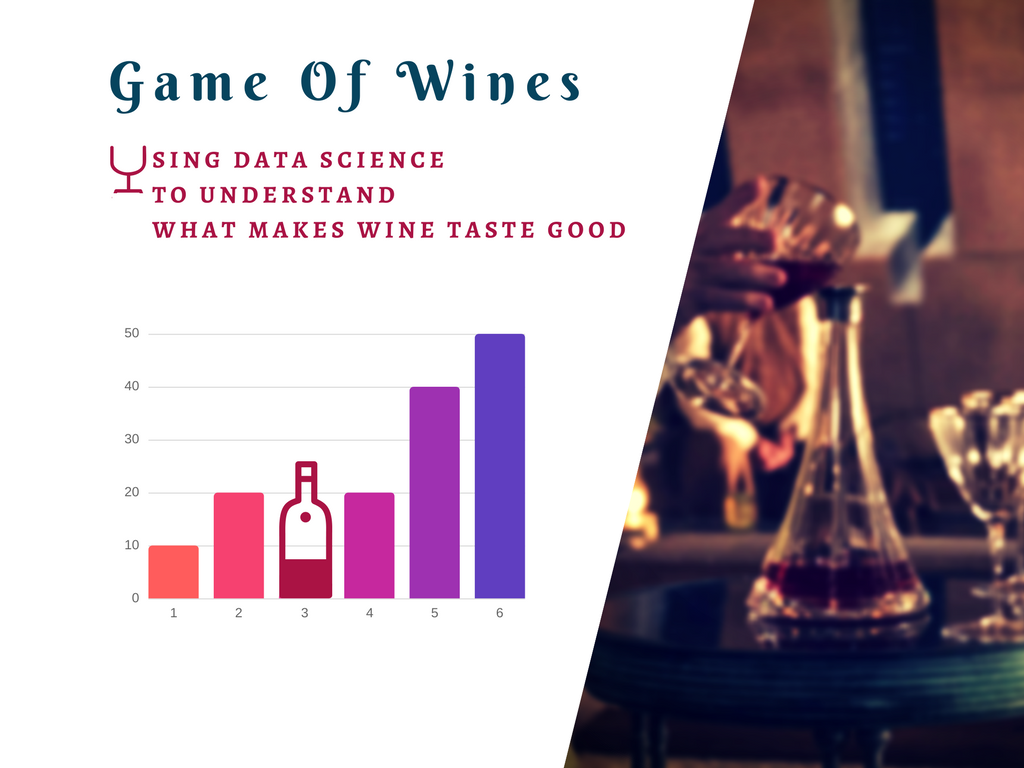

In [1]:
from IPython.display import Image
Image('wine.png')

#### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


#### Loading

In [3]:
wine_df = pd.read_csv("wineQualityReds.csv")
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### To Check Data is Numeric or Categorical?


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Summary of the data

In [5]:
wine_df.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

####  Correlation using Heatmap

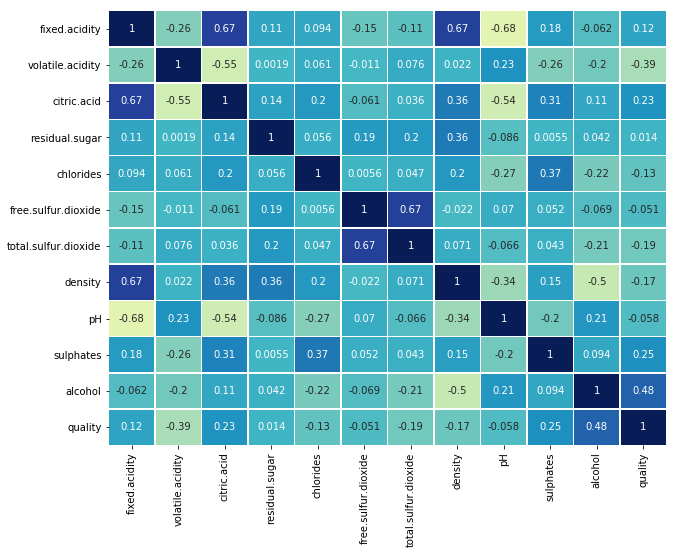

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


#### quality has the highest positive correlation with alcohol content and highest negative correlation with volatile acidity

def pairplot(cols_keep):
    g = sns.pairplot(wine_df,vars=cols_keep,kind='reg',hue='quality')
    return

cols_keep = list(wine_df.columns[0:3])
pairplot(cols_keep)


cols_keep = list(wine_df.columns[3:7])
pairplot(cols_keep)

cols_keep = list(wine_df.columns[7:11])
pairplot(cols_keep)

In [7]:
#levels of Y variable
wine_df['quality'].value_counts()
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
#Combine 7&8 together; combine 3 and 4 with 5
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

## Splitting the dataset

In [9]:
X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=22)


In [10]:
X_train.shape,X_test.shape

((1199, 11), (400, 11))

## Model1:- Criterion='gini'

In [12]:
model_gini=DecisionTreeClassifier()

In [13]:
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
preds_gini = model_gini.predict(X_test)

## Evaluation Metrics

In [16]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[130  53   7]
 [ 50 102   9]
 [  4  20  25]]


In [31]:
#Calculate accuracy
print(accuracy_score(y_test,preds_gini))

0.6425


In [27]:
print(metrics.classification_report(y_test,preds_gini))

             precision    recall  f1-score   support

          5       0.71      0.68      0.70       190
          6       0.58      0.63      0.61       161
          7       0.61      0.51      0.56        49

avg / total       0.64      0.64      0.64       400



## Model1:- Criterion='entropy'

In [19]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [21]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
preds_entropy = model_entropy.predict(X_test)
preds_entropy_train = model_entropy.predict(X_train)

In [40]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_gini)

confusion matrix = 
 [[130  56   4]
 [ 52  94  15]
 [  3  18  28]]


## Evaluation Metrics

In [42]:
print(accuracy_score(y_test,preds_entropy))
print(accuracy_score(y_train,preds_entropy_train))

0.63
1.0


#### Accuracy of train data is 100% whereas accuracy of test data is only 63% indicating an overfit model

In [34]:
print(metrics.classification_report(y_test,preds_entropy))

             precision    recall  f1-score   support

          5       0.70      0.68      0.69       190
          6       0.56      0.58      0.57       161
          7       0.60      0.57      0.58        49

avg / total       0.63      0.63      0.63       400



In [ ]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds)

print("confusion matrix = \n",mat_train)

## Visualizing the tree

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [24]:
xvar = wine_df.drop('quality', axis=1)
feature_cols = xvar.columns

### Tree from entropy

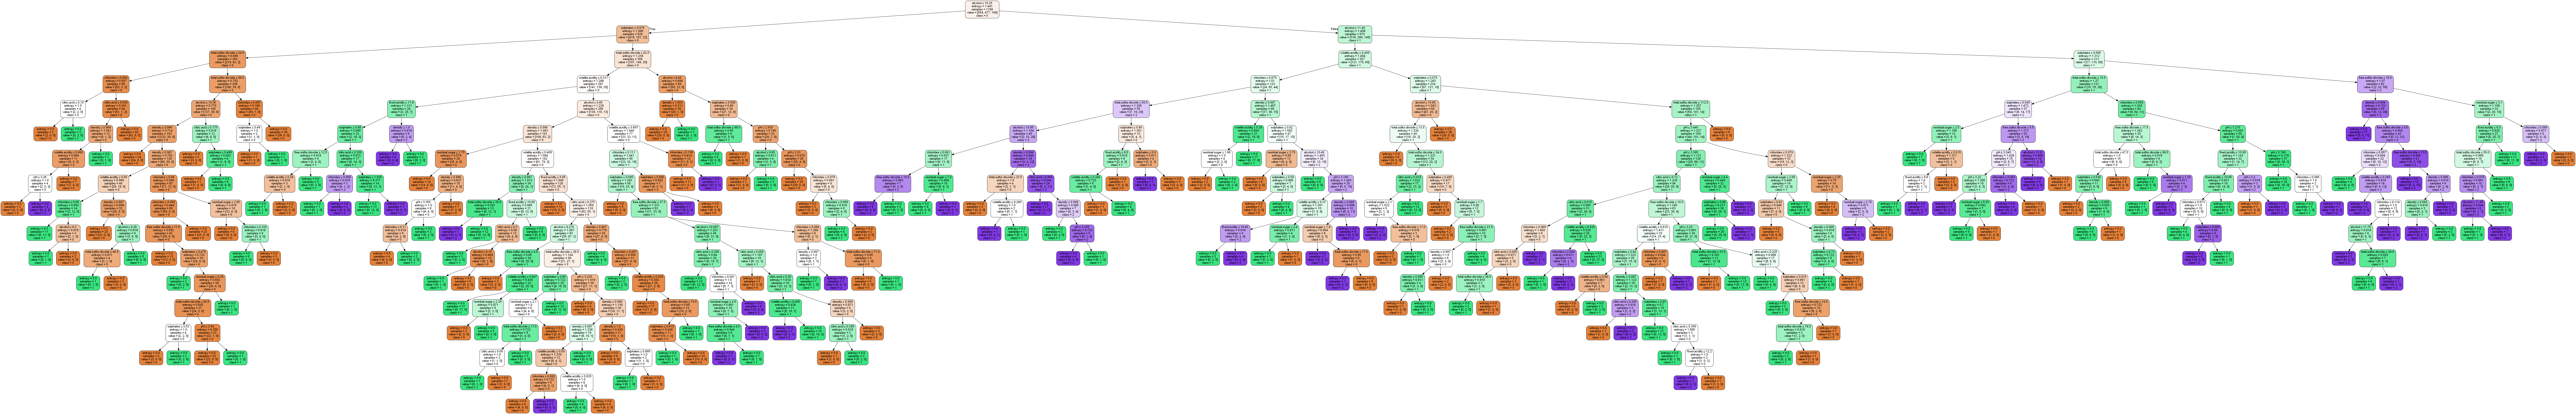

In [35]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_entropy.png')
Image(graph.create_png())

## Tree from GINI

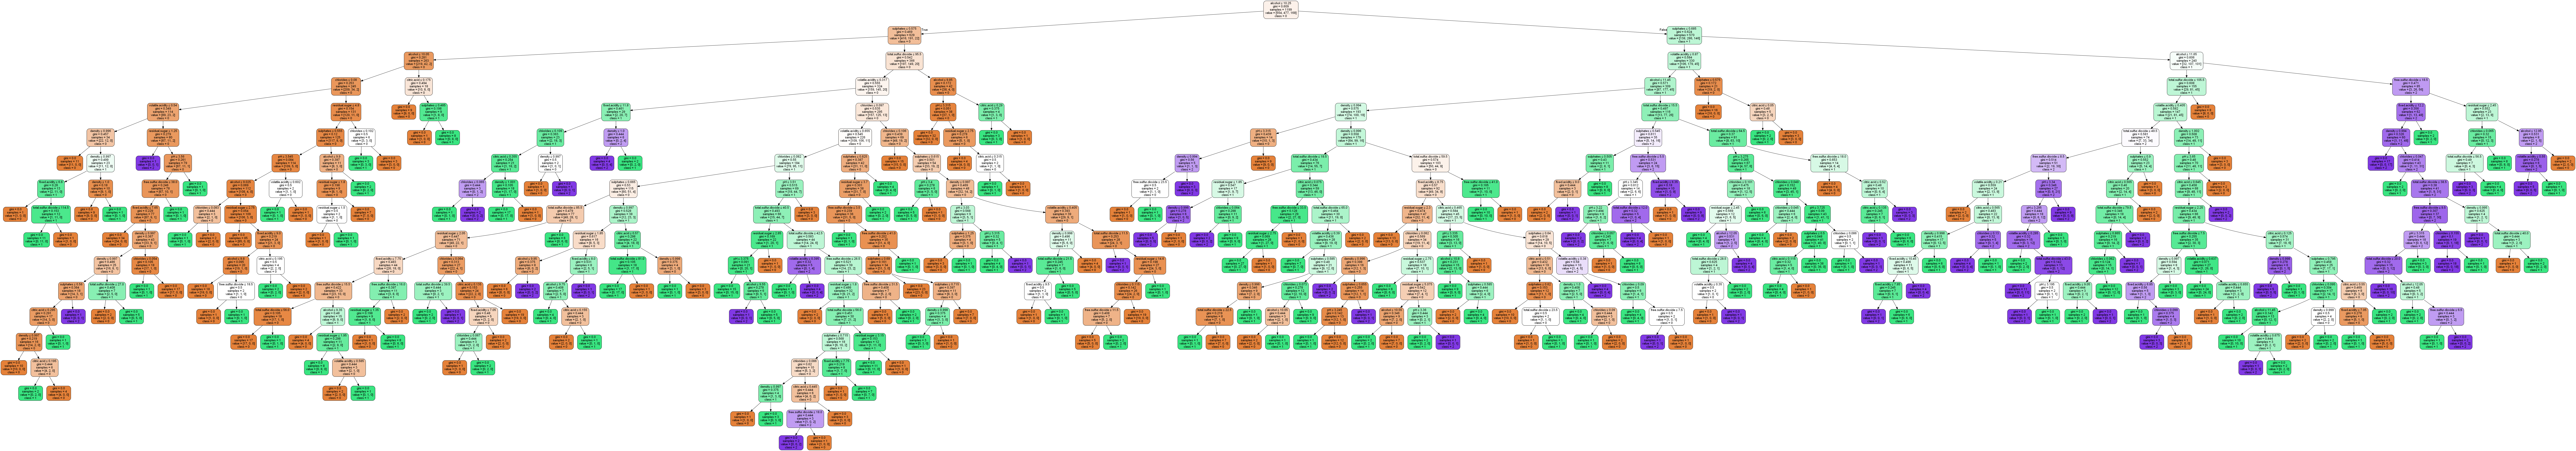

In [36]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines.png')
Image(graph.create_png())

https://www.youtube.com/watch?v=f85ARatXIFA

#### The tree is overgrown due to which there is overfitting - we will now prune the tree and re-evaluate the model

## Pruning

In [47]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

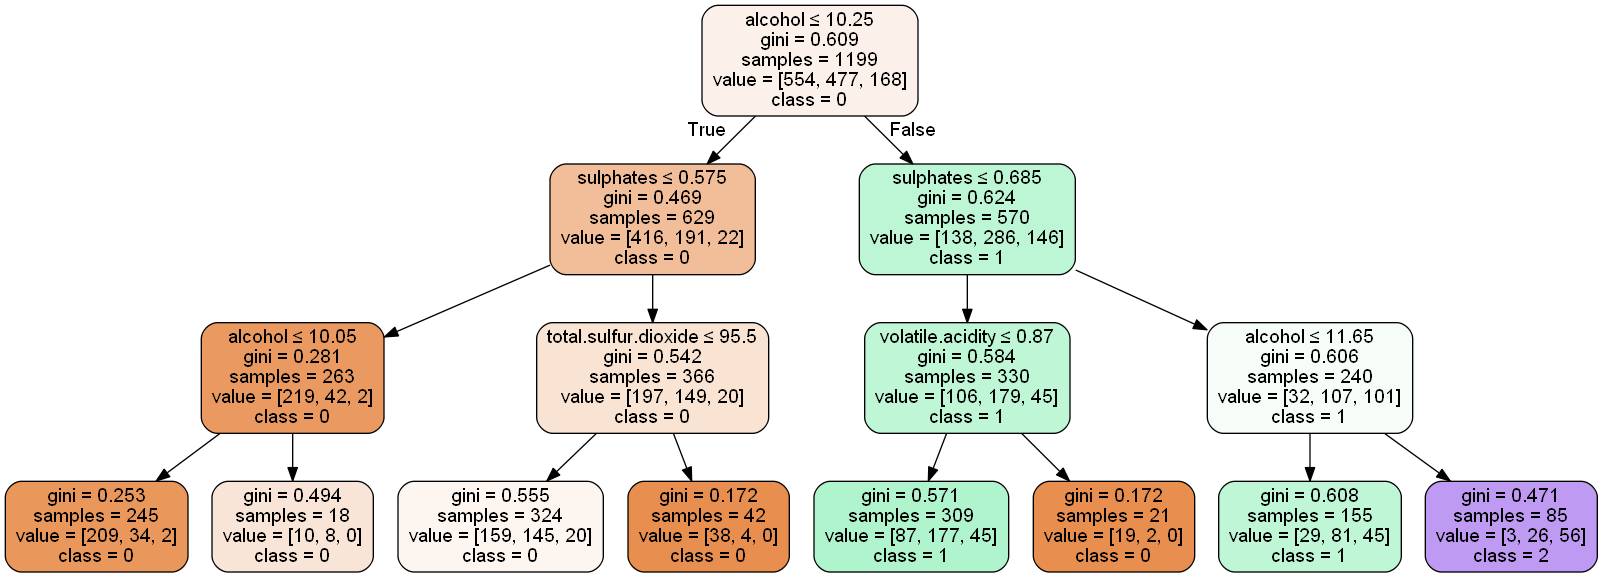

In [48]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [49]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [50]:
#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_pruned = confusion_matrix(y_test,preds_pruned)

print("confusion matrix = \n",mat_pruned)

confusion matrix = 
 [[142  48   0]
 [ 73  82   6]
 [  5  28  16]]


In [53]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.6
0.6246872393661385


In [54]:
print(metrics.classification_report(y_test,preds_pruned))

             precision    recall  f1-score   support

          5       0.65      0.75      0.69       190
          6       0.52      0.51      0.51       161
          7       0.73      0.33      0.45        49

avg / total       0.60      0.60      0.59       400



## Calculating feature importance

In [55]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.         0.01045793 0.         0.         0.         0.
 0.00928219 0.         0.         0.0337105  0.07779214]


In [57]:
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
alcohol               0.592735
sulphates             0.256856
volatile.acidity      0.079684
total.sulfur.dioxide  0.070725
fixed.acidity         0.000000
citric.acid           0.000000
residual.sugar        0.000000
chlorides             0.000000
free.sulfur.dioxide   0.000000
density               0.000000
pH                    0.000000